In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


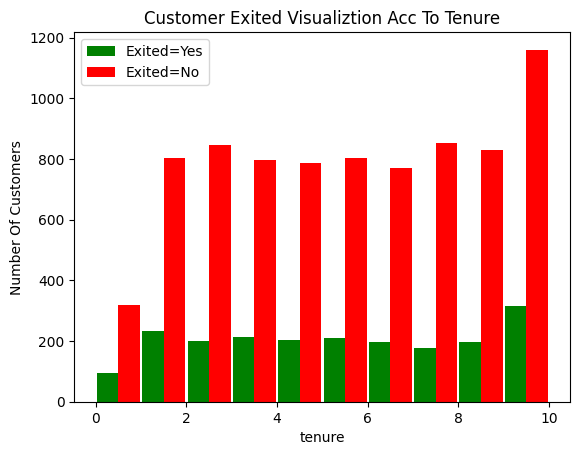

In [8]:
tenure_exited = df[df.Exited==1].Tenure
tenure_not_exited = df[df.Exited==0].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Visualiztion Acc To Tenure")
plt.hist([tenure_exited, tenure_not_exited], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

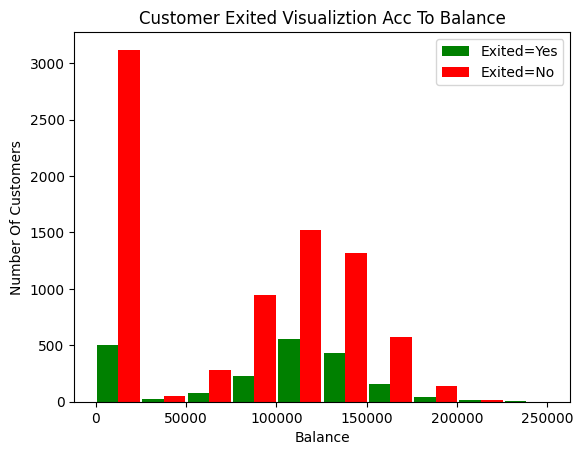

In [9]:
bc_exited = df[df.Exited==1].Balance      
bc_exited_no = df[df.Exited==0].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Visualiztion Acc To Balance")

plt.hist([bc_exited, bc_exited_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
df[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,Spain,Female,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,France,Female,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,Spain,Female,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [12]:
df.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

In [13]:
dummies = pd.get_dummies(df['Geography'],drop_first=True,dtype=int)

In [14]:
df = pd.concat([df,dummies],axis=1)

In [15]:
df = df.drop('Geography',axis=1)

In [16]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [18]:
X = df.drop('Exited',axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(11,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

C:\Users\viraj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7871 - loss: 0.5867
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7947 - loss: 0.4816
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4613
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8015 - loss: 0.4624
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4456
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8093 - loss: 0.4421
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8187 - loss: 0.4265
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8199 - loss: 0.4252
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8177 - loss: 0.4255
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8263 - loss: 0.4083
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8188 - loss: 0.4101
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [20]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8671 - loss: 0.3440


[0.3427259027957916, 0.8650000095367432]

In [21]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.06744965],
       [0.01679098],
       [0.11716665],
       [0.11189923],
       [0.0355367 ]], dtype=float32)

In [22]:
y_pred = []
for value in yp:
    if value > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [23]:
from sklearn.metrics import confusion_matrix as cm, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



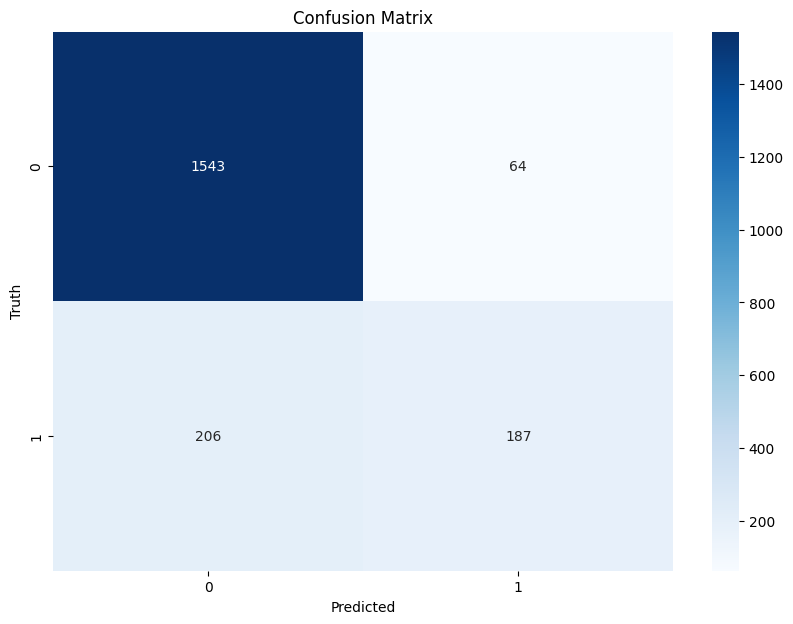

In [25]:
import seaborn as sns

cm = cm(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()